In [1]:
from fractions import *
import matplotlib.pyplot as plt
from math import comb

def SpreadPoly(n): # returns a list with the coefficients of S_n(s)
    p = []
    for k in range(1,n+1):
        p += [Fraction(-n * comb(n+k,n-k) * (-4)**k, (2*(n+k)))]
    return p[::-1]

def PolyEval(p, x): # evaluates the polynumber at x in an efficient way
    r = Fraction(0,1)
    for k in range(len(p)):
        i = p[k]
        r = x * (i + r)
    return r

def getPoints(n, density): # denisty = number of points to generate
    p = SpreadPoly(n) # get the list of S_n(s) coefficients
    i = Fraction(1, density) # tiny steps of 1/density 
    k = Fraction(-1,density) # to let the process start at x = 0
    x, y = [], []
    for j in range(density+1):
        k += i # advance one step in the x axis
        x.append(k)
        y.append(PolyEval(p, k))
    return x, y



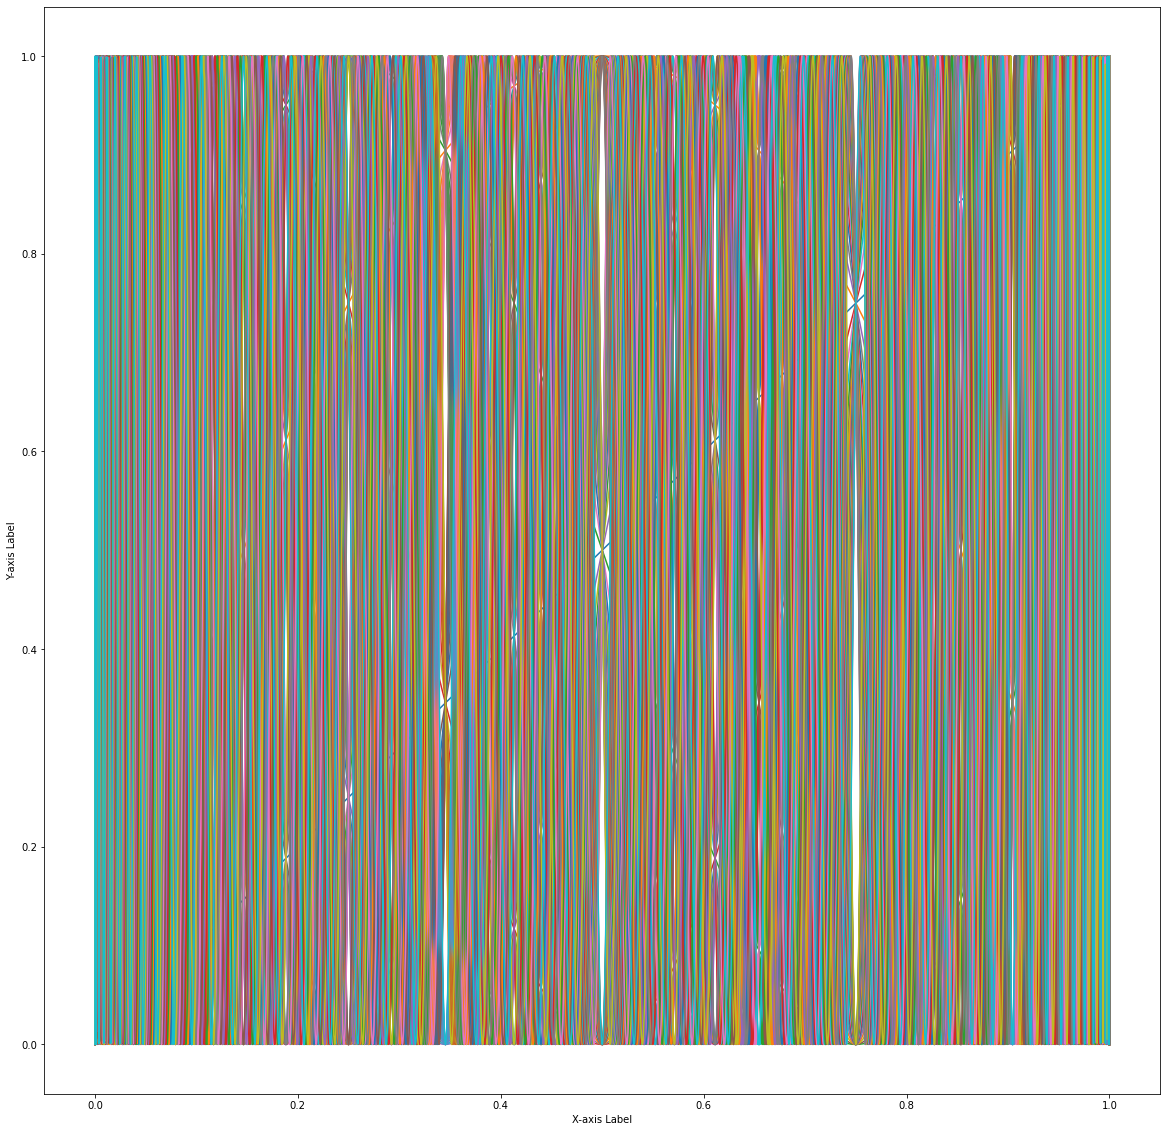

In [9]:
density = 2**12
fig = plt.figure(figsize = (20, 20))
# Create the plot from S_91 to S_100
for n in range(1,101):
    x, y = getPoints(n,density)
    plt.xlabel('X-axis Label')
    plt.ylabel('Y-axis Label')
    plt.plot(x, y)

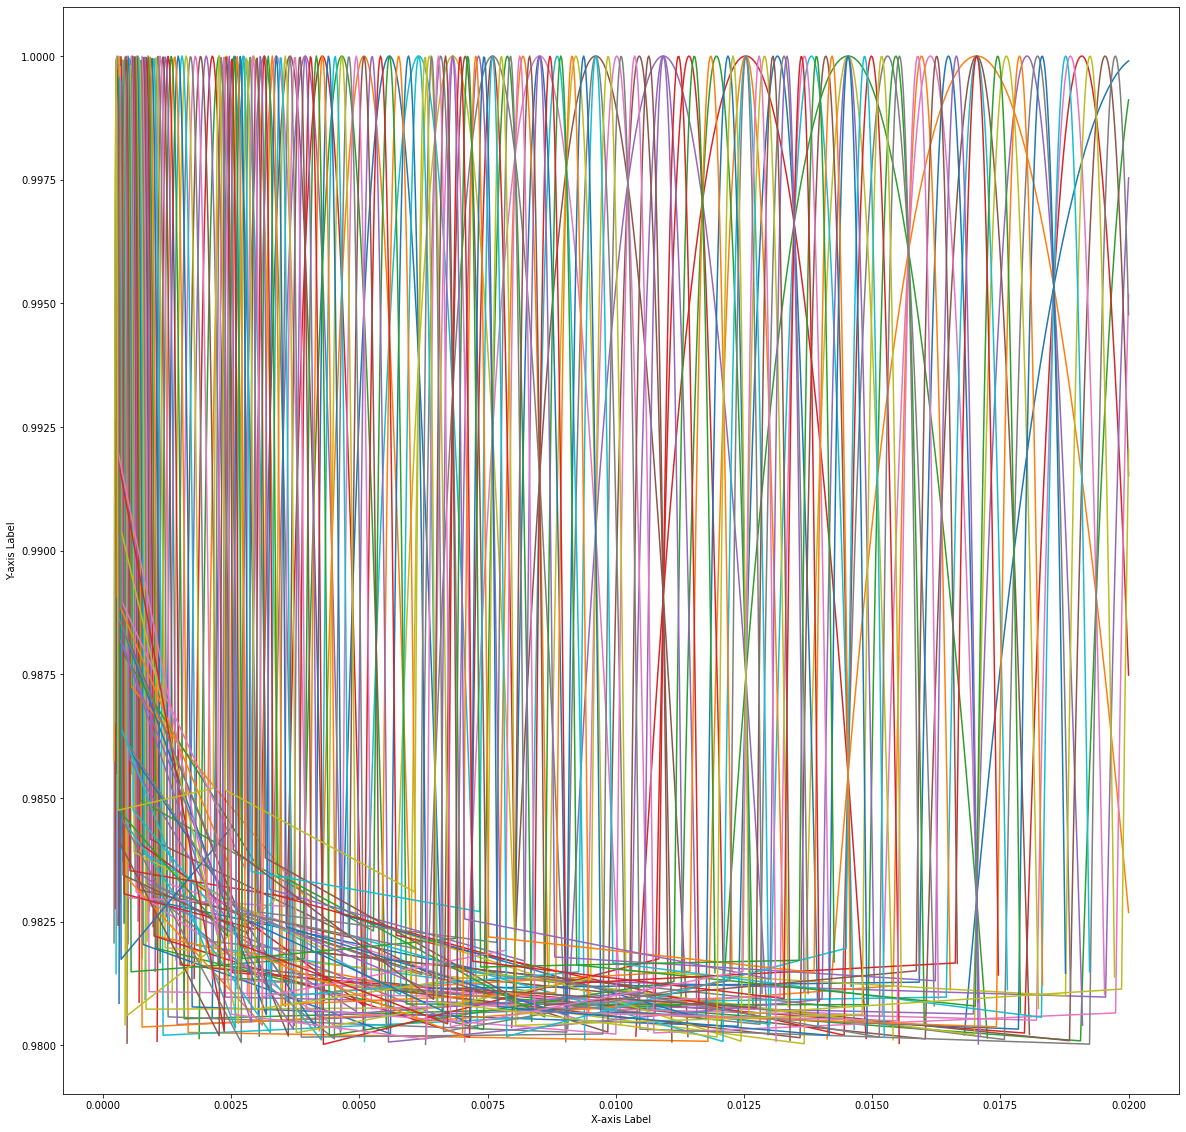

In [11]:
def getPointsInBox(n, density, xBounds, yBounds):  # to zoom in a particular box
    p = SpreadPoly(n)
    i = Fraction(xBounds[1]-xBounds[0], density)
    k = xBounds[0] + Fraction(xBounds[0]-xBounds[1], density)
    x, y = [], []
    for j in range(density+1):
        k += i
        tmp = PolyEval(p, k)
        if (yBounds[0] <= tmp) and (tmp <= yBounds[1]):
            x.append(k)
            y.append(tmp)
    return x, y

density = 2**12
fig = plt.figure(figsize = (20, 20))
# Create the plot from S_91 to S_100
xBounds = [Fraction(0,1000), Fraction(20,1000)]
yBounds = [Fraction(980,1000), Fraction(1000,1000)]
for n in range(1,100):
    x, y = getPointsInBox(n,density,xBounds,yBounds)
    plt.xlabel('X-axis Label')
    plt.ylabel('Y-axis Label')
    plt.plot(x, y)